In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import fnmatch

# Import land use data that are flooded
Prior analysis was done in ArcGIS

In [10]:
flooded_LU_dir = r"C:\Users\hypak\OneDrive - Singapore Management University\Documents\Data\SG_SLR\landuse_flood"
flooded_LU_slr4m = [os.path.join(flooded_LU_dir,fp) for fp in sorted(os.listdir(flooded_LU_dir)) if fnmatch.fnmatch(fp,"*slr_4.csv")]
flooded_LU_slr5m = [os.path.join(flooded_LU_dir,fp) for fp in sorted(os.listdir(flooded_LU_dir)) if fnmatch.fnmatch(fp,"*slr_5.csv")]
print(len(flooded_LU_slr4m))

42


In [21]:
def summarise_lu_statistics(fp):
    """ 
    @param fp (str): filepath of csv that shows area of each land use polygon
    returns an aggregated sum for each unique land use type
    """
    df = pd.read_csv(fp)
    df_sum = df.groupby(['LU_DESC'])[['Area']].sum().reset_index() # sum area by land use type
    lu_dict = df_sum.to_dict('list')
    return {lu:area for lu,area in zip(lu_dict['LU_DESC'],lu_dict['Area'])}
    
summarise_lu_statistics(flooded_LU_slr4m[27])

{'AGRICULTURE': 0.043669991370196996,
 'BEACH AREA': 0.208204823778749,
 'BUSINESS 1': 0.529279292717802,
 'BUSINESS 1 - WHITE': 0.051481577663067,
 'BUSINESS 2': 9.392868856244252,
 'BUSINESS 2 - WHITE': 0.034243186981182,
 'BUSINESS PARK': 1.3390762893e-05,
 'CIVIC & COMMUNITY INSTITUTION': 0.259677010423339,
 'COMMERCIAL': 0.529981360100747,
 'COMMERCIAL & RESIDENTIAL': 0.092904491183598,
 'COMMERCIAL / INSTITUTION': 0.12907518576093,
 'EDUCATIONAL INSTITUTION': 0.386595051949252,
 'HEALTH & MEDICAL CARE': 0.021297485775516,
 'HOTEL': 0.092866308298946,
 'MASS RAPID TRANSIT': 0.013986665340935,
 'OPEN SPACE': 1.070984005459352,
 'PARK': 1.5652354886331359,
 'PLACE OF WORSHIP': 0.058011945987776,
 'PORT / AIRPORT': 5.2574519232387695,
 'RESERVE SITE': 5.394624685140781,
 'RESIDENTIAL': 4.055516684969256,
 'RESIDENTIAL / INSTITUTION': 0.115032263587527,
 'RESIDENTIAL WITH COMMERCIAL AT 1ST STOREY': 0.167991242437166,
 'ROAD': 3.863761947529874,
 'SPECIAL USE': 0.48209025504758,
 'SPOR

# Obtain the land use breakdown for 4m SLR

In [26]:
# initialise dict to add up land use area
flooded_LU_area_slr4m = dict()
for fp in flooded_LU_slr4m:
    lu_dict = summarise_lu_statistics(fp)
    for lu,area in lu_dict.items():
        if lu not in list(flooded_LU_area_slr4m):
            flooded_LU_area_slr4m[lu] = area
        else:
            flooded_LU_area_slr4m[lu] += area
print(f'Total flooded area at 4m SLR: {sum(list(flooded_LU_area_slr4m.values()))} km2')
flooded_LU_area_slr4m

Total flooded area at 4m SLR: 49.70916758652668 km2


{'SPORTS & RECREATION': 0.9440969451435941,
 'AGRICULTURE': 0.063611017566072,
 'OPEN SPACE': 2.481538465523157,
 'BUSINESS 2': 10.436647965970844,
 'BEACH AREA': 0.229461234770591,
 'PLACE OF WORSHIP': 0.05975222134441,
 'RESERVE SITE': 6.83917795568207,
 'UTILITY': 2.002821643027119,
 'ROAD': 3.865213641584934,
 'TRANSPORT FACILITIES': 0.09163369689103801,
 'WATERBODY': 8.193500755823814,
 'SPECIAL USE': 0.5423680020714781,
 'BUSINESS 1': 0.529279292717802,
 'BUSINESS 1 - WHITE': 0.051481577663067,
 'BUSINESS 2 - WHITE': 0.034243186981182,
 'BUSINESS PARK': 1.3390762893e-05,
 'CIVIC & COMMUNITY INSTITUTION': 0.259677010423339,
 'COMMERCIAL': 0.529981360100747,
 'COMMERCIAL & RESIDENTIAL': 0.092904491183598,
 'COMMERCIAL / INSTITUTION': 0.12907518576093,
 'EDUCATIONAL INSTITUTION': 0.386595051949252,
 'HEALTH & MEDICAL CARE': 0.021297485775516,
 'HOTEL': 0.092866308298946,
 'MASS RAPID TRANSIT': 0.013986665340935,
 'PARK': 1.5652354886331359,
 'PORT / AIRPORT': 5.2574519232387695,
 'R

# Obtain the land use breakdown for 5m SLR

In [27]:
# initialise dict to add up land use area
flooded_LU_area_slr5m = dict()
for fp in flooded_LU_slr5m:
    lu_dict = summarise_lu_statistics(fp)
    for lu,area in lu_dict.items():
        if lu not in list(flooded_LU_area_slr5m):
            flooded_LU_area_slr5m[lu] = area
        else:
            flooded_LU_area_slr5m[lu] += area
print(f'Total flooded area at 5m SLR: {sum(list(flooded_LU_area_slr5m.values()))} km2')
flooded_LU_area_slr5m

Total flooded area at 5m SLR: 115.34770158345351 km2


{'SPORTS & RECREATION': 1.4655402596111191,
 'AGRICULTURE': 0.207177741810863,
 'OPEN SPACE': 6.5620485847388546,
 'BUSINESS 2': 34.2672402428841,
 'BEACH AREA': 0.27245583647314,
 'PLACE OF WORSHIP': 0.13028130228735701,
 'RESERVE SITE': 10.511685833512022,
 'UTILITY': 4.48333773735339,
 'ROAD': 9.75856938544115,
 'TRANSPORT FACILITIES': 0.403532073444617,
 'WATERBODY': 9.560979937804166,
 'SPECIAL USE': 2.7851708431120246,
 'BUSINESS 1': 1.504584012759032,
 'BUSINESS 1 - WHITE': 0.117369250050077,
 'BUSINESS 2 - WHITE': 0.040839157234534,
 'BUSINESS PARK': 0.008595588204081,
 'CIVIC & COMMUNITY INSTITUTION': 0.529126640379966,
 'COMMERCIAL': 0.918432078757331,
 'COMMERCIAL & RESIDENTIAL': 0.163834264310269,
 'COMMERCIAL / INSTITUTION': 0.135186772790845,
 'EDUCATIONAL INSTITUTION': 0.86181295340038,
 'HEALTH & MEDICAL CARE': 0.080320895727961,
 'HOTEL': 0.175165727916643,
 'MASS RAPID TRANSIT': 0.032051574628048,
 'PARK': 3.026732597341273,
 'PORT / AIRPORT': 16.66169275493637,
 'RES

# Plots

## Split land use type into major groups

In [49]:
import re
def simplify_landuse_types(landuse):
    """ 
    @param landuse (list of str): unique land use str
    """
    landuse_dict = {i:None for i in sorted(landuse)}
    for l in landuse:
        if re.match("^BUSINESS",l):
            landuse_dict[l] = "BUSINESS"
        elif re.match("^COMMERCIAL",l):
            landuse_dict[l] = "COMMERCIAL"
        elif re.match("^RESIDENTIAL",l):
            landuse_dict[l] = "RESIDENTIAL"
        elif re.match(".*RAPID TRANSIT$",l):
            landuse_dict[l] = "RAPID TRANSIT"
        else:
            landuse_dict[l] = l
    return landuse_dict

simplify_landuse_types(list(flooded_LU_area_slr4m))

def cmap_landuse(landuse,cmap='gist_rainbow'):
    """ 
    @param landuse (list of str): unique land use str
    returns a sorted cmap based on landuse names that maps similar landuse type to a color
    """
    cm = plt.get_cmap(cmap)
    landuse_dict = simplify_landuse_types(landuse)
    n_colors = len(set(landuse_dict.values()))
    np.random.seed(1)
    cmap_simplified = {lu_simplified: cm(v) for lu_simplified, v in zip(set(landuse_dict.values()),np.random.random(n_colors))}
    cmap = {lu: cmap_simplified[lu_simplified] for lu, lu_simplified in landuse_dict.items()}
    return cmap

cmap_landuse(list(flooded_LU_area_slr4m))

{'AGRICULTURE': (1.0, 0.0, 0.16, 1.0),
 'BEACH AREA': (1.0, 0.8977212506624273, 0.0, 1.0),
 'BUSINESS 1': (0.0, 1.0, 0.7379295804343246, 1.0),
 'BUSINESS 1 - WHITE': (0.0, 1.0, 0.7379295804343246, 1.0),
 'BUSINESS 2': (0.0, 1.0, 0.7379295804343246, 1.0),
 'BUSINESS 2 - WHITE': (0.0, 1.0, 0.7379295804343246, 1.0),
 'BUSINESS PARK': (0.0, 1.0, 0.7379295804343246, 1.0),
 'CIVIC & COMMUNITY INSTITUTION': (1.0, 0.0, 0.013594771241830061, 1.0),
 'COMMERCIAL': (0.0, 1.0, 0.8644317942230659, 1.0),
 'COMMERCIAL & RESIDENTIAL': (0.0, 1.0, 0.8644317942230659, 1.0),
 'COMMERCIAL / INSTITUTION': (0.0, 1.0, 0.8644317942230659, 1.0),
 'EDUCATIONAL INSTITUTION': (0.16304347826086973, 0.0, 1.0, 1.0),
 'HEALTH & MEDICAL CARE': (1.0, 0.8341282458929519, 0.0, 1.0),
 'HOTEL': (0.29676735559088496, 1.0, 0.0, 1.0),
 'MASS RAPID TRANSIT': (0.0, 0.26321398124467155, 1.0, 1.0),
 'OPEN SPACE': (0.0, 1.0, 0.08433480919249393, 1.0),
 'PARK': (0.0, 1.0, 0.08433480919249393, 1.0),
 'PLACE OF WORSHIP': (1.0, 0.940116

# Plot inundated landuse breakdown

C:\Users\hypak\AppData\Local\Temp\ipykernel_3352\1566143400.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
C:\Users\hypak\AppData\Local\Temp\ipykernel_3352\1566143400.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


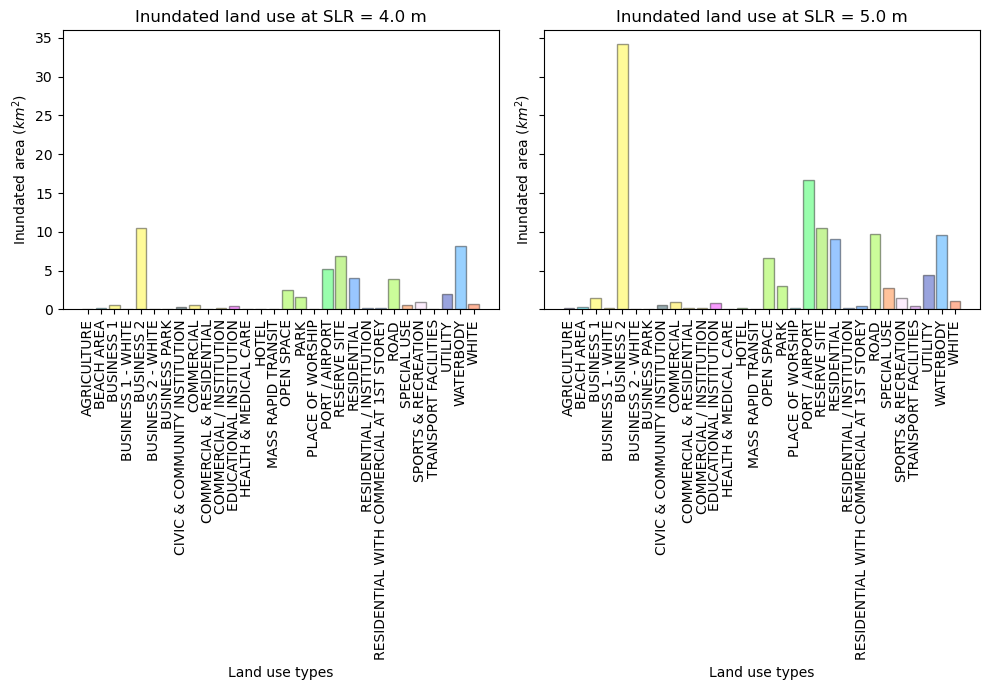

In [61]:
def landuse_barplot(flooded_LU_dict, ax = None,cmap = 'gist_ncar'):
    """
    @param flooded_LU_dict (dict): keys are land use, values are flooded area in km2
    """
    cmap = cmap_landuse(list(flooded_LU_dict),cmap) # sorted cmap based on landuse names
    # sort landuse based on landuse name
    flooded_LU_dict = dict(sorted(flooded_LU_dict.items()))
    if ax is None:
        fig, ax = plt.subplots()
    ax.bar(list(flooded_LU_dict),list(flooded_LU_dict.values()), 
           color = list(cmap.values()),alpha=0.4,edgecolor='black')
    # ax.set_yscale('log')
    ax.set_ylabel('Inundated area $(km^2)$')
    ax.set_xlabel('Land use types')
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    if ax is None:
        plt.tight_layout()
        plt.show()

# landuse_barplot(flooded_LU_area_slr4m, ax = None,cmap='gist_ncar')

fig, axes = plt.subplots(1,2,figsize=(10,7),sharey=True)
landuse_barplot(flooded_LU_area_slr4m, ax = axes[0],cmap = 'gist_ncar')
landuse_barplot(flooded_LU_area_slr5m, ax = axes[1],cmap = 'gist_ncar')
axes[0].set_title('Inundated land use at SLR = 4.0 m')
axes[1].set_title('Inundated land use at SLR = 5.0 m')
plt.tight_layout()
plt.show()